In [ ]:
!pip install lexical-diversity
!pip install textstat
# !pip install transformers==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 KB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/GPT

### Change the input and results from the models according to the dataset
### preprocessed input dataset
input_text_file= "DagPap22_Corpus.csv"

### Results from detectgpt and gptzero models , i.e. script# 1_
result_detectgpt_file= "DAGPap22_result_detectgpt.csv"
result_gptzero_file= "DAGPap22_result_gptzero.csv"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/GPT


In [ ]:
import pandas as pd

### df_combined is the combined gpt3.5  + human text
df_combined = pd.read_csv(input_text_file, index_col=0)
df_combined=df_combined.reset_index(drop=True)

### result from GPTZero : V1
gptzero = pd.read_csv(result_gptzero_file, index_col=0)

### result from DetectGPT: V1_1
detectgpt = pd.read_csv(result_detectgpt_file, index_col=0)
gptzero = gptzero.rename(columns={"label": "label_v1", "sr_no":"sr_no_v1", "desc": "desc_v1"})
detectgpt = detectgpt.rename(columns={"label": "label_v1_1", "sr_no":"sr_no_v1_1", "desc": "desc_v1_1"})

### Merge both results
df_all= pd.concat([df_combined, gptzero, detectgpt], axis=1)
df_all['source'] = df_all['source'].map({"human":1, "chatgpt":0})
df_all.to_csv("actual_resultv1_resultv1_1.csv")

In [ ]:
print(df_combined.head())
print(result_v1.head())
print(result_v1_1.head())

In [ ]:
print(df_combined.shape)
print(result_v1.shape)
print(result_v1_1.shape)

In [ ]:
import nltk
nltk.download('punkt')

import seaborn as sns
import matplotlib.pyplot as plt
_, axarr = plt.subplots(1,2, figsize=(12, 4))

def hist_plot(sentence_list , words_or_sentences ='words', x_lab="Sentence count", y_lab='Frequency', stat="probability", ax=axarr[0], x_start=None, x_end=None):
  from nltk import tokenize
  data=[len(tokenize.word_tokenize(x) if words_or_sentences== 'words' else tokenize.sent_tokenize(x)) for x in sentence_list]
  x_lab=x_lab+" - no of "+ words_or_sentences
  ax1 = sns.histplot(data, stat=stat, ax=ax)
  ax1.set(xlabel=x_lab, ylabel=y_lab)
  # import pdb
  # pdb.set_trace()
  if (x_start is not None and x_end is not None):
    ax1.set(xlim=(x_start , x_end))
    ax1.set_xticks(range(1,32))
  return ax1

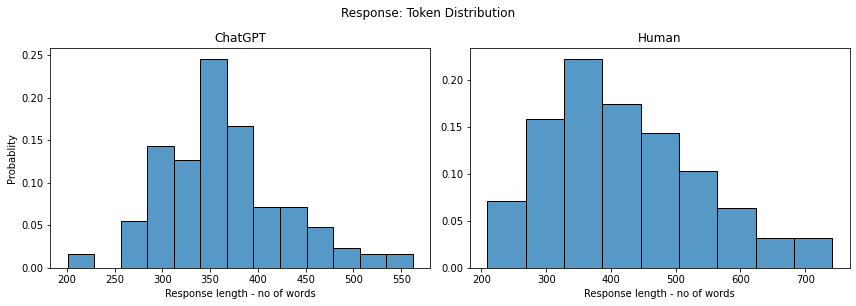

In [ ]:
fig, axarr = plt.subplots(1,2, figsize=(12, 4))
axarr[0].set_title("ChatGPT")
axarr[1].set_title("Human")

hist_plot(df_combined.text[df_combined.source == "chatgpt"], words_or_sentences ='words', x_lab="Response length", y_lab='Probablity', stat="probability",ax=axarr[0]  )
hist_plot(df_combined.text[df_combined.source == "human"], words_or_sentences ='words',x_lab="Response length", y_lab=None, stat="probability",ax=axarr[1]  )

fig.suptitle('Response: Token Distribution', y=1.05)
plt.tight_layout()
plt.show()

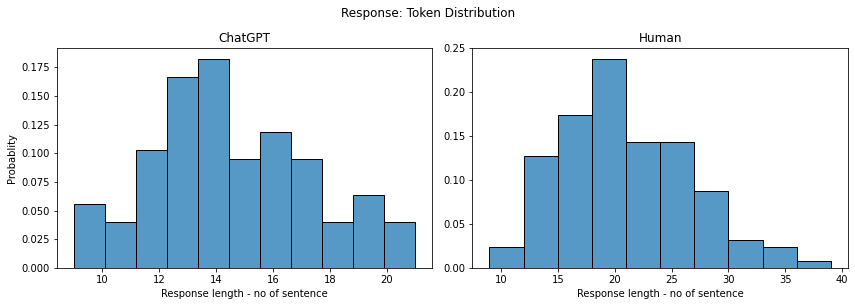

In [ ]:
fig, axarr = plt.subplots(1,2, figsize=(12, 4))
axarr[0].set_title("ChatGPT")
axarr[1].set_title("Human")

hist_plot(df_combined.text[df_combined.source == "chatgpt"], words_or_sentences ='sentence', x_lab="Response length", y_lab='Probablity', stat="probability",ax=axarr[0]  )
hist_plot(df_combined.text[df_combined.source == "human"], words_or_sentences ='sentence', x_lab="Response length", y_lab=None, stat="probability",ax=axarr[1]  )

fig.suptitle('Response: Token Distribution', y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
from lexical_diversity import lex_div as ld
import textstat

def hist_readability_score(text_list, title="Title"):
  flesch_kincaid=[textstat.flesch_reading_ease(x) for x in text_list]
  coleman_liau=[textstat.coleman_liau_index(x) for x in text_list]
  gunning_fog=[textstat.gunning_fog(x) for x in text_list]
  automated_readability_index=[textstat.automated_readability_index(x) for x in text_list]
  # lexicon_count=[textstat.lexicon_count(x) for x in text_list]
  lexical_diversity = [ld.ttr(ld.flemmatize(x)) for x in text_list]

  fig, axarr = plt.subplots(1,5, figsize=(20,4))
  sns.histplot(flesch_kincaid, ax=axarr[0],stat="probability")
  sns.histplot(coleman_liau, ax=axarr[1],stat="probability")
  sns.histplot(gunning_fog, ax=axarr[2],stat="probability")
  sns.histplot(automated_readability_index, ax=axarr[3],stat="probability")
  sns.histplot(lexical_diversity, ax=axarr[4],stat="probability")

  axarr[0].set(xlabel = 'Score', ylabel='Probability', title= "flesch_reading_ease")
  axarr[1].set(xlabel = 'Score', ylabel=None, title= "coleman_liau_index")
  axarr[2].set(xlabel = 'Score', ylabel=None, title= "gunning_fog")
  axarr[3].set(xlabel = 'Score', ylabel=None, title= "automated_readability_index")
  axarr[4].set(xlabel = 'Score', ylabel=None, title= "lexical_diversity(TTR)")
  fig.suptitle( ": Complexity and Readability scores: "+title, y=1.05)

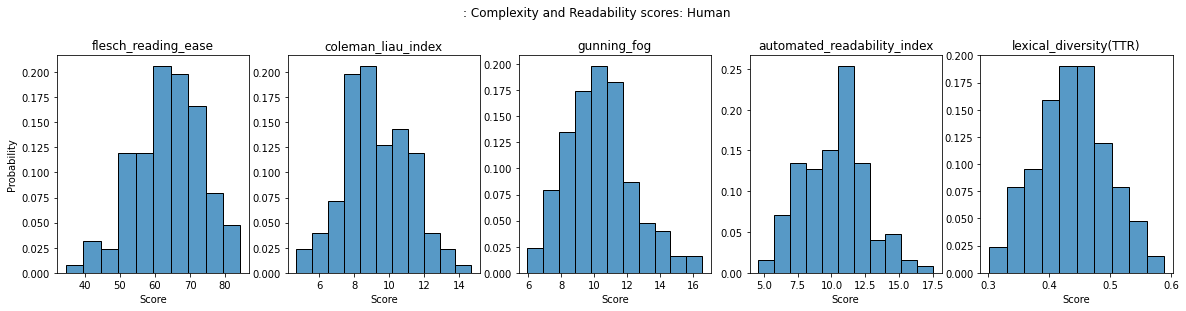

In [ ]:
hist_readability_score(df_combined['text'][df_combined.source=='human'], "Human")

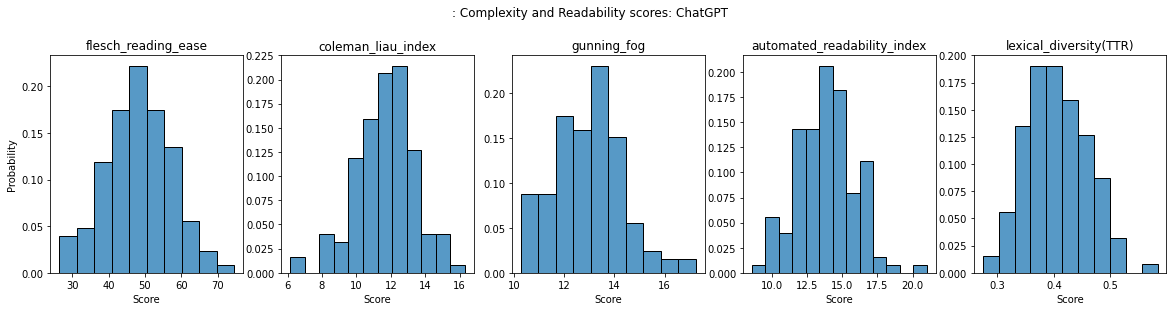

In [ ]:
hist_readability_score(df_combined['text'][df_combined.source=='chatgpt'], "ChatGPT")